In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp -r /content/drive/MyDrive/Projects \content40

# **Load the dataset**#

In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = '/content/content40/Datasets'
datagen = ImageDataGenerator(rescale=1./255)

data_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)
folder_classes = data_generator.class_indices
print("Class Labels:", folder_classes)

Found 736 images belonging to 2 classes.
Class Labels: {'Control': 0, 'Patient': 1}


# **Split data into training , test, validation**


In [6]:

import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split

In [7]:

import os
import shutil
import random

original_data_dir = '/content/content40/Datasets'
test_data_dir = '/content/content40/datatest'

test_percentage = 0.2
os.makedirs(test_data_dir, exist_ok=True)
image_counts = {}

for class_name in os.listdir(original_data_dir):
    class_dir = os.path.join(original_data_dir, class_name)
    if not os.path.isdir(class_dir):
        continue

    test_class_dir = os.path.join(test_data_dir, class_name)
    os.makedirs(test_class_dir, exist_ok=True)

    files = os.listdir(class_dir)
    num_test_files = int(len(files) * test_percentage)

    test_files = random.sample(files, num_test_files)

    for file in test_files:
        shutil.move(os.path.join(class_dir, file), os.path.join(test_class_dir, file))

print("Test dataset created successfully!")

Test dataset created successfully!


In [8]:
#show the number of images in the training dataset
import os
dataset_dir = '/content/content40/Datasets'
image_counts = {}

for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    if not os.path.isdir(class_dir):
        continue
    files = os.listdir(class_dir)
    num_images = len(files)
    image_counts[class_name] = num_images

print("Number of images in each folder:")
for class_name, count in image_counts.items():
    print(f"Class '{class_name}': {count} images")

Number of images in each folder:
Class 'Patient': 475 images
Class 'Control': 116 images


In [9]:

import os
dataset_dir = '/content/content40/datatest'
image_counts = {}

for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    if not os.path.isdir(class_dir):
        continue

    files = os.listdir(class_dir)
    num_images = len(files)
    image_counts[class_name] = num_images

print("Number of images in each folder:")
for class_name, count in image_counts.items():
    print(f"Class '{class_name}': {count} images")

Number of images in each folder:
Class 'Patient': 118 images
Class 'Control': 29 images


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = '/content/content40/Datasets'
test_dir = '/content/content40/datatest'



train_datagen = ImageDataGenerator(rescale=1.0/255,validation_split=0.1)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 531 images belonging to 2 classes.
Found 58 images belonging to 2 classes.
Found 147 images belonging to 2 classes.


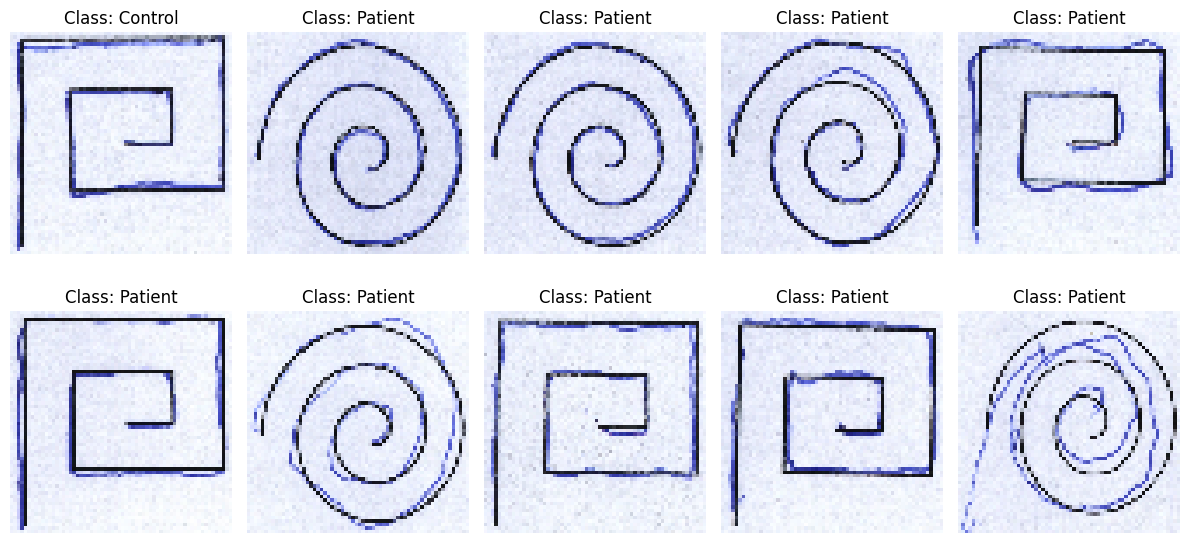

In [11]:

import matplotlib.pyplot as plt
images, labels = next(train_generator)

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {list(train_generator.class_indices.keys())[labels[i].argmax()]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

#  Build the CNN Model#
1/Define the CNN architecture

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization # Import BatchNormalization
from tensorflow.keras import layers,models
from tensorflow.keras.layers import Conv2DTranspose, UpSampling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


In [20]:

model = Sequential([
    Conv2D(32, (5, 5), padding='valid',strides=1,   activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2), strides=2),


    Conv2D(64, (5, 5),  padding='valid', strides=1, activation='relu'),
    MaxPooling2D((2, 2), strides=2),



    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
   Dense(2, activation='sigmoid')
])




2/ Compile the model

In [21]:
#model=depthwise_cnn(64,64,3)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:


from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(
    filepath='/content/content40/Checkpoint/model.keras',
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

Display a summary of the model

In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 60, 60, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       1,384,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,438,530 (5.49 MB)

 Trainable params: 1,438,530 (5.49 MB)

 Non-trainable params: 0 (0.00 B)

3/ Train the Model


In [23]:

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


In [24]:

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    callbacks=[checkpoint]
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.7369 - loss: 0.7003
Epoch 1: val_loss improved from inf to 0.48130, saving model to /content/content40/Checkpoint/model.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 392ms/step - accuracy: 0.7386 - loss: 0.6941 - val_accuracy: 0.8103 - val_loss: 0.4813
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 0.7840 - loss: 0.5314
Epoch 2: val_loss did not improve from 0.48130
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 500ms/step - accuracy: 0.7851 - loss: 0.5304 - val_accuracy: 0.8103 - val_loss: 0.4858
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.7734 - loss: 0.5681
Epoch 3: val_loss did not improve from 0.48130
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 354ms/step - accuracy: 0.7751 - loss: 0.5658 - val_accuracy: 0.8103 - val_loss: 0.4818
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.8155 - loss: 0.4752
Epoch 4: val_loss did not improve from 0.48130
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 417ms/step - accuracy: 0.8149 - loss

 4/ Evaluate the Model on the validation Data

In [27]:

val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy* 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.9217 - loss: 0.2499
Validation Loss: 0.25828343629837036
Validation Accuracy: 91.38%


 5/ Evaluate the Model on the test Data





In [29]:

test_loss, test_accuracy =model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.7587 - loss: 0.5896
Test Accuracy: 85.03%


6/ Visualize Training  and Validation Results

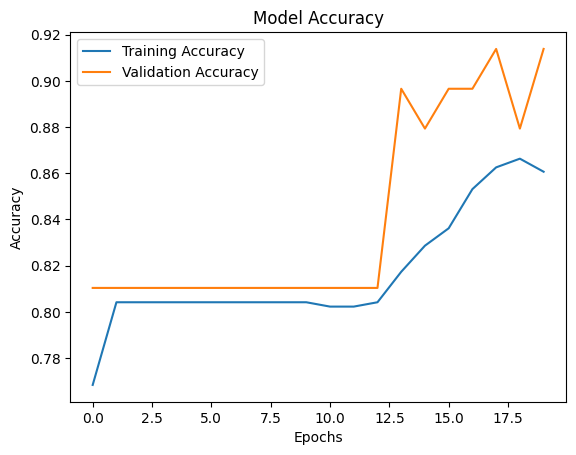

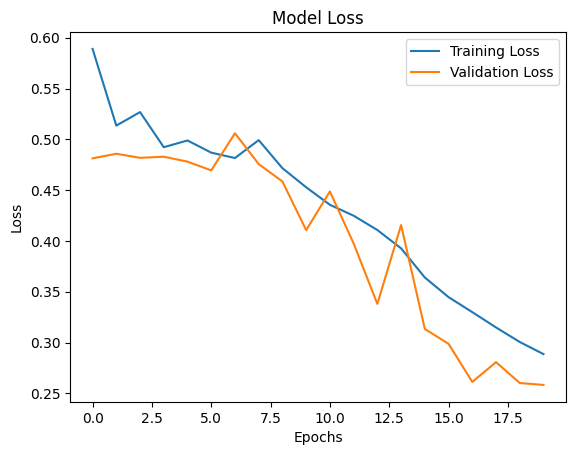

In [30]:
#visualize Training Results
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


7/ Save the Model

In [31]:
# Save the trained model for future use
model.save("/content/drive/MyDrive/Projects/cnn_parkinson_detection.keras")